In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openai
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [4]:
# Load the dataset
df = pd.read_csv('titanic/train.csv')  

# Drop columns that are not useful for now
df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

# Fix missing values 
df.fillna({'Age': df['Age'].median(), 'Embarked': df['Embarked'].mode()[0]}, inplace=True)


In [5]:
# Convert string categories to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [8]:
# Generate Title Feature (GenAI-style Feature Engineering)
# load raw data to get 'Name' column
raw_df = pd.read_csv('titanic/train.csv')

# Extract Title using regex 
raw_df['Title'] = raw_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Add Title column to main df
df['Title'] = raw_df['Title']

# Group rare titles
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 
                                   'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Encode Title column
df['Title'] = df['Title'].map({'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Other': 5})


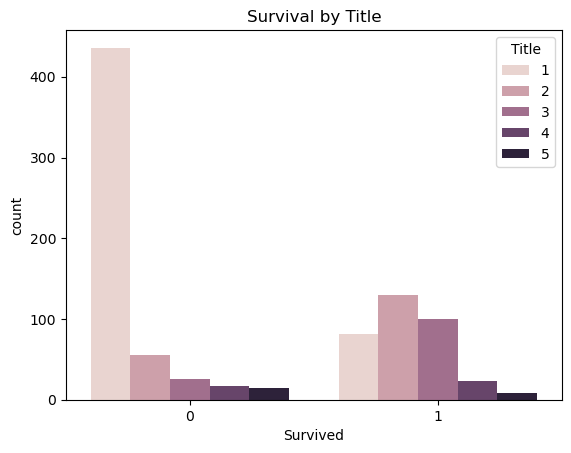

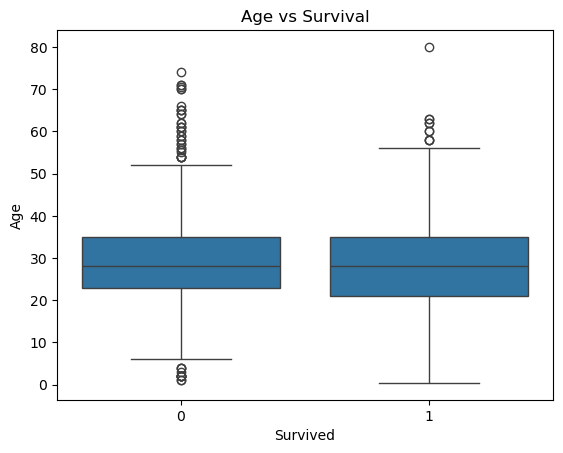

In [9]:
#Exploratory Data Analysis (EDA)
# Plot survival count by title
sns.countplot(x='Survived', hue='Title', data=df)
plt.title("Survival by Title")
plt.show()

# Plot age vs survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()


In [13]:

# STEP 5: Convert categorical data
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# STEP 6: Split data into features and target
X = df.drop('Survived', axis=1)
y = df['Survived']


In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
#  Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [16]:
#Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Model Accuracy: {accuracy:.2f}")


🎯 Model Accuracy: 0.85


In [19]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Title', 'Sex_1', 'Embarked_1', 'Embarked_2'],
      dtype='object')


In [21]:
print(df[['Sex_1', 'Gender']].head(10))


   Sex_1 Gender
0  False    NaN
1   True    NaN
2   True    NaN
3   True    NaN
4  False    NaN
5  False    NaN
6  False    NaN
7  False    NaN
8   True    NaN
9   True    NaN


In [22]:
df['Gender'] = df['Sex_1'].map({True: 'Male', False: 'Female'})


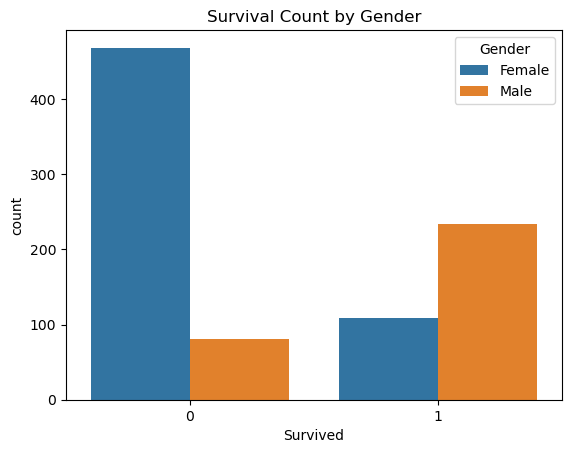

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', hue='Gender', data=df)
plt.title("Survival Count by Gender")
plt.show()


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


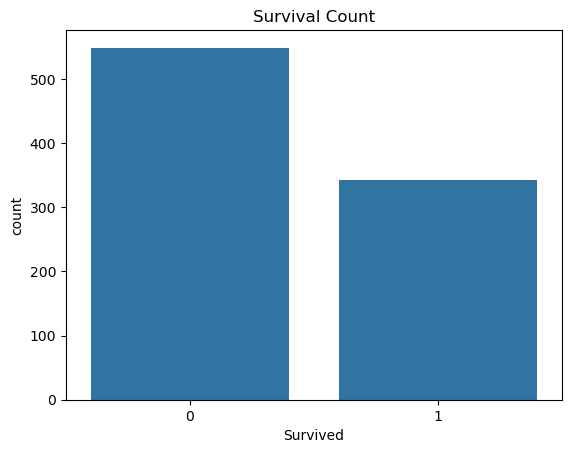

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
train = pd.read_csv("titanic/train.csv")

# Show first few rows 
print(train.head())

# Now you can do plots
sns.countplot(x='Survived', data=train)
plt.title('Survival Count')
plt.show()


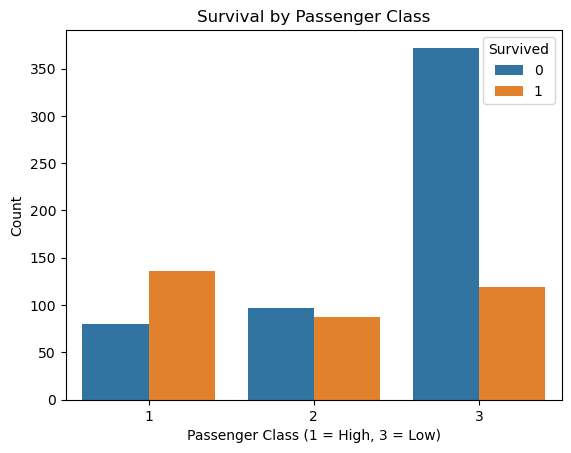

In [5]:
#Survival by Passenger Class (Pclass)
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class (1 = High, 3 = Low)')
plt.ylabel('Count')
plt.show()


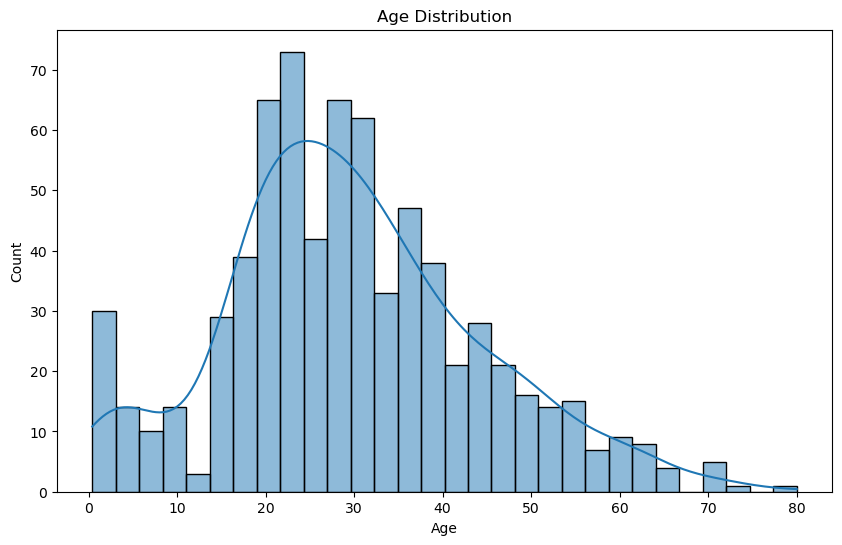

In [6]:
#Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(data=train, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


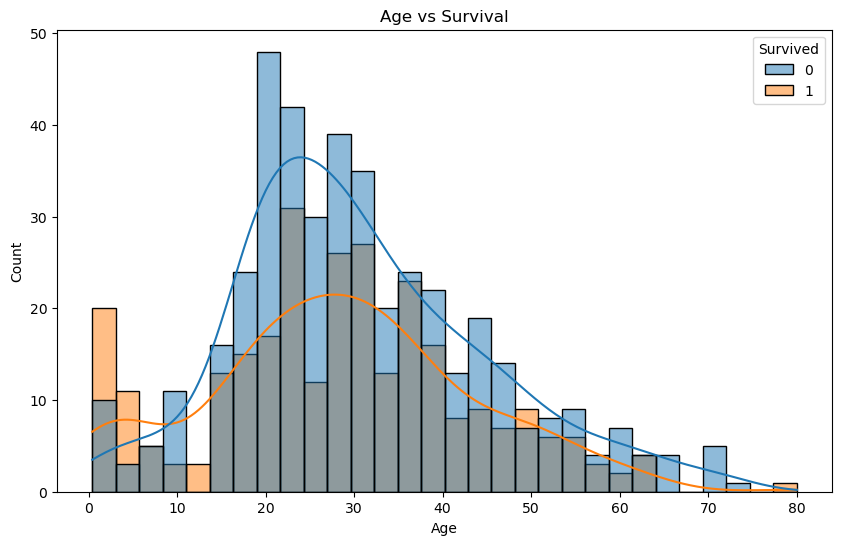

In [7]:
# Age vs Survival
plt.figure(figsize=(10,6))
sns.histplot(data=train, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age vs Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


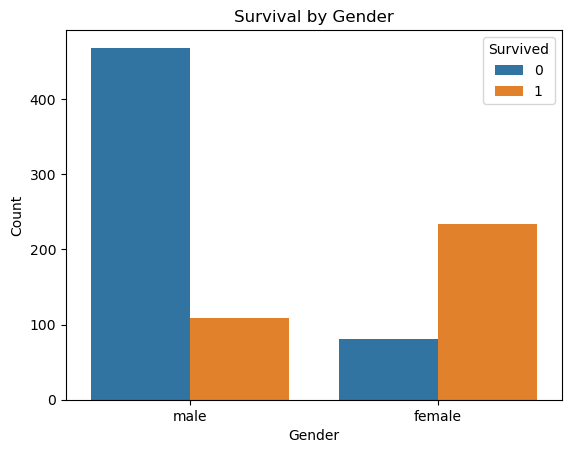

In [9]:
#Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


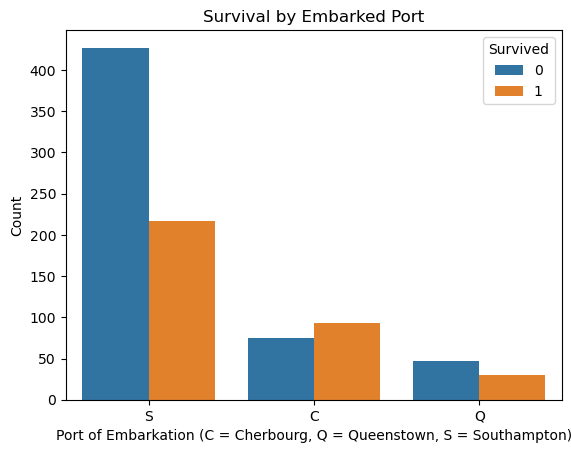

In [10]:
#Survival by Embarked Port
sns.countplot(x='Embarked', hue='Survived', data=train)
plt.title('Survival by Embarked Port')
plt.xlabel('Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Count')
plt.show()


In [11]:
#Generative AI Based Prediction
from transformers import pipeline

# Create a text generation pipeline
generator = pipeline("text-generation", model="distilgpt2")

# Example prompt
prompt = "Based on the data, this passenger is likely to"

# Generate prediction (simulate output like a human-style prediction)
output = generator(prompt, max_length=30, num_return_sequences=1)
print(output[0]['generated_text'])


config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

C:\Users\syeds\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\syeds\.cache\huggingface\hub\models--distilgpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP downl

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Based on the data, this passenger is likely to have been a victim of a traffic accident. After all, if he doesn't have a valid driver's license, he cannot be considered a transit vehicle without a valid driver's license.


In [20]:
from transformers import pipeline

# Use a better prompt with clear context
prompt = (
    "As a Titanic survival prediction expert, explain the survival outcome for the following passenger:\n"
    "Age: 35\n"
    "Passenger Class: 2\n"
    "Sex: male\n"
    "Prediction: Did not survive.\n"
    "Explanation:"
)

# Load the lightweight model
generator = pipeline("text-generation", model="distilgpt2")

# Generate the AI explanation
output = generator(prompt, max_new_tokens=60)[0]["generated_text"]

# Extract only generated explanation
explanation = output.replace(prompt, "").strip()
print("🧠 AI Explanation:\n", explanation)


Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


🧠 AI Explanation:
 The Titanic was the first in the world to reach the surface of the Atlantic Ocean.
The Titanic was the first in the world to reach the surface of the Atlantic Ocean.
The Titanic was the first in the world to reach the surface of the Atlantic Ocean.
The Titanic was the first in


In [21]:
# Sample input values
age = 35
pclass = 2
sex = "male"
prediction = "Did not survive"

# Create an AI-style explanation manually (you can automate later)
if prediction == "Did not survive":
    explanation = (
        f"Based on the input details:\n"
        f"• Age: {age}\n"
        f"• Passenger Class: {pclass}\n"
        f"• Sex: {sex}\n\n"
        f"The model predicted that the passenger did not survive.\n"
        f"Explanation: Males in Class {pclass}, especially around age {age}, had lower survival rates on the Titanic. "
        f"Survival was more likely for females and those in higher classes (Class 1)."
    )
else:
    explanation = (
        f"Based on the input details:\n"
        f"• Age: {age}\n"
        f"• Passenger Class: {pclass}\n"
        f"• Sex: {sex}\n\n"
        f"The model predicted that the passenger survived.\n"
        f"Explanation: Survival was more likely for females, younger passengers, and those in Class 1. "
        f"This passenger fits one or more of those criteria."
    )

print("🧠 AI Explanation:\n", explanation)


🧠 AI Explanation:
 Based on the input details:
• Age: 35
• Passenger Class: 2
• Sex: male

The model predicted that the passenger did not survive.
Explanation: Males in Class 2, especially around age 35, had lower survival rates on the Titanic. Survival was more likely for females and those in higher classes (Class 1).
